In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import io
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns', 500)

# Neighbourhood Census Data

In [36]:
neighbourhood_census = pd.read_csv('archive/NYC_neighborhood_census_data_2020.csv')
neighbourhood_census.head()

,Neighborhood,Born in New York State,Car-free commute (% of commuters),Disabled population,FHAVA-backed home purchase loans (% of home purchase loans),Foreign-born population,Higher-cost home purchase loans (% of home purchase loans),Higher-cost refinance loans (% of refinance loans),"Home purchase loan rate (per 1,000 properties)",Home purchase loans in LMI tracts (% of home purchase loans),Home purchase loans to LMI borrowers (% of home purchase loans),Homeownership rate,Households with children under 18 years old,"Housing choice vouchers (% of occupied, privately owned rental units)",Housing units,Income diversity ratio,"Index of housing price appreciation, 1 family building","Index of housing price appreciation, 2-4 family building","Index of housing price appreciation, 5+ family building","Index of housing price appreciation, all property types","Index of housing price appreciation, condominium",Labor force participation rate,Mean travel time to work (minutes),Median household income (2018$),"Median household income, homeowners (2018$)","Median household income, renters (2018$)","Median rent, 2- and 3-bedrooms (2018$)","Median rent, all (2018$)","Median rent, asking","Median rent, recent movers (2018$)","Median rent, studios and 1-bedrooms (2018$)","Median sales price per unit, 1 family building (2018$)","Median sales price per unit, 2-4 family building (2018$)","Median sales price per unit, 5+ family building (2018$)","Median sales price per unit, condominium (2018$)",Moderately rent-burdened households,"Moderately rent-burdened households, low income","Moderately rent-burdened households, moderate income","Notices of foreclosure rate (per 1,000 1-4 family and condo properties)","Notices of foreclosure, all residential properties","Notices of foreclosure, initial, 1-4 family and condo properties","Notices of foreclosure, repeat, 1-4 family and condo properties",Percent Asian,Percent Hispanic,Percent black,Percent white,Population,Population aged 25+ without a high school diploma,Population aged 65+,"Population density (1,000 persons per square mile)",Poverty rate,"Poverty rate, population aged 65+","Poverty rate, population under 18 years old","Pre-foreclosure notice rate (per 1,000 1-4 family and condo properties)","Pre-foreclosure notices, 1-4 family and condo properties",Private eviction filings,Private eviction filings per 1000 private rental units,"Properties entering REO, 1-4 family",Public housing (% of rental units),Racial diversity index,"Refinance loan rate (per 1,000 properties)",Rental units affordable at 30% AMI (% of recently available units),Rental units affordable at 80% AMI (% of recently available units),Rental units affordable at 120% AMI (% of recently available units),Rental vacancy rate,Residential units within 12 mile of a subway station,Residential units within 14 mile of a park,"Sales volume, 1 family building","Sales volume, 2-4 family building","Sales volume, 5+ family building","Sales volume, all property types","Sales volume, condominium","Serious crime rate (per 1,000 residents)","Serious crime rate, property (per 1,000 residents)","Serious crime rate, violent (per 1,000 residents)","Serious housing code violations (per 1,000 privately owned rental units)",Severe crowding rate (% of renter households),Severely rent-burdened households,"Severely rent-burdened households, low income","Severely rent-burdened households, moderate income",Single-person households,"Students performing at grade level in English language arts, 4th grade","Students performing at grade level in math, 4th grade","Total housing code violations (per 1,000 privately owned rental units)",Unemployment rate,Units authorized by new residential building permits,Units issued new certificates of occupancy
0,Greenpoint/Williamsburg,46.7,84.4,6.8,0.0,24.9,0.0,1.7,27.7,1.0,15.7,15.8,19.5,8.2,69834,7.7,583.0,648.8,718.5,455.4,NaN,71.4,34.6,78070,83030,77200,1540,2000,2980,2300,1700,2420290,734840,383850,947740,26.7,26.6,35.6,5.6,109

In [37]:
# Getting out the columns in the data
print(neighbourhood_census.columns)

Index(['Neighborhood', 'Born in New York State',
       'Car-free commute (% of commuters)', 'Disabled population',
       'FHAVA-backed home purchase loans (% of home purchase loans)',
       'Foreign-born population',
       'Higher-cost home purchase loans (% of home purchase loans)',
       'Higher-cost refinance loans (% of refinance loans)',
       'Home purchase loan rate (per 1,000 properties)',
       'Home purchase loans in LMI tracts (% of home purchase loans)',
       'Home purchase loans to LMI borrowers (% of home purchase loans)',
       'Homeownership rate', 'Households with children under 18 years old',
       'Housing choice vouchers (% of occupied, privately owned rental units)',
       'Housing units', 'Income diversity ratio',
       'Index of housing price appreciation, 1 family building',
       'Index of housing price appreciation, 2-4 family building',
       'Index of housing price appreciation, 5+ family building',
       'Index of housing price appreciation,

In [56]:
# Selecting the more useful columns

neighbourhood_census_trimmed = neighbourhood_census[[
    'Neighborhood', 
    'Car-free commute (% of commuters)', 
    'Disabled population',
    'Foreign-born population',
    'Median household income (2018$)',
    'Median rent, all (2018$)',
    'Moderately rent-burdened households',
    'Percent Asian', 
    'Percent Hispanic', 
    'Percent black', 
    'Percent white',
    'Population', 
    'Poverty rate',
    'Public housing (% of rental units)',
    'Unemployment rate'
    ]]

neighbourhood_census_trimmed.head()

,Neighborhood,Car-free commute (% of commuters),Disabled population,Foreign-born population,Median household income (2018$),"Median rent, all (2018$)",Moderately rent-burdened households,Percent Asian,Percent Hispanic,Percent black,Percent white,Population,Poverty rate,Public housing (% of rental units),Unemployment rate
0,Greenpoint/Williamsburg,84.4,6.8,24.9,78070,2000,26.7,7.0,21.6,3.6,64.5,152002,23.3,11.1,5.49
1,Fort Greene/Brooklyn Heights,90.9,8.7,18.8,94330,1920,21.7,9.0,14.9,25.8,47.2,135444,14.9,11.1,5.55
2,Bedford Stuyvesant,78.2,8.8,18.4,52900,1240,25.5,2.7,19.4,48.8,26.6,142027,24.4,18.8,4.73
3,Bushwick,82.2,7.0,30.3,51620,1460,26.4,5.6,53.9,17.0,21.5,140474,27.1,4.5,5.23
4,East New York/Starrett City,76.6,7.3,31.5,37490,1250,26.2,3.8,38.2,52.8,3.9,176471,24.7,16.7,8.98


## Distribution

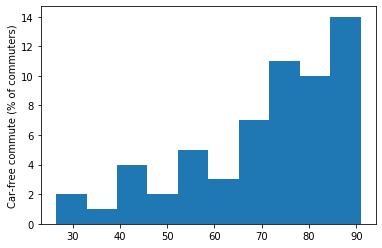

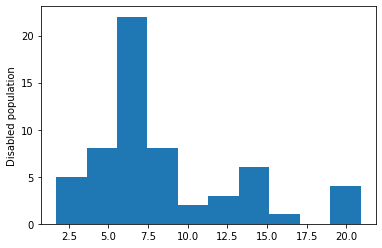

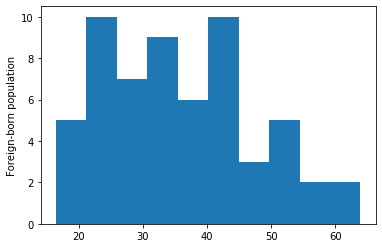

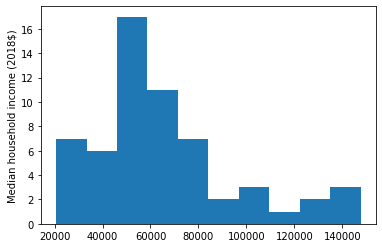

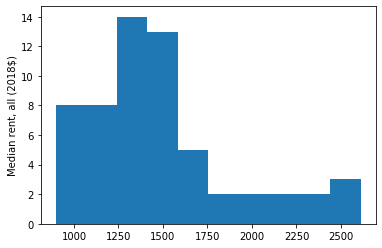

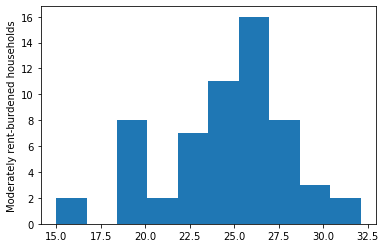

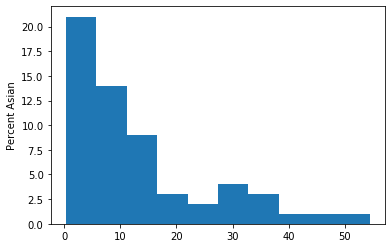

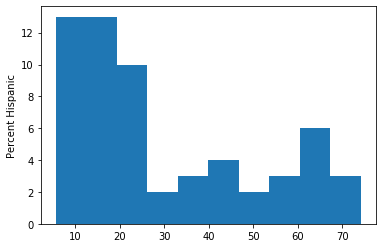

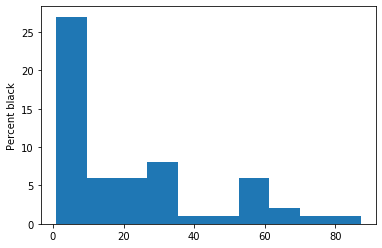

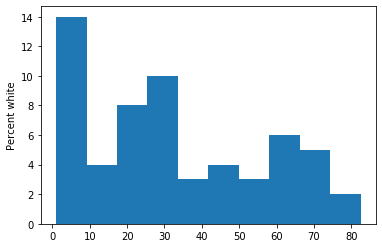

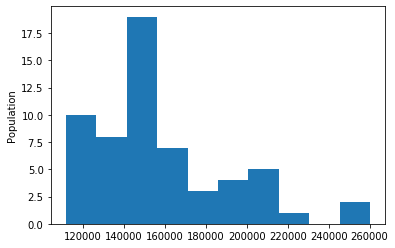

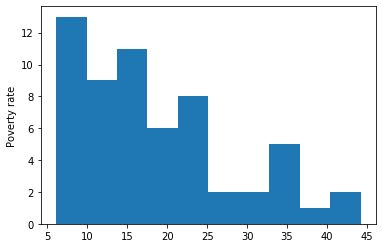

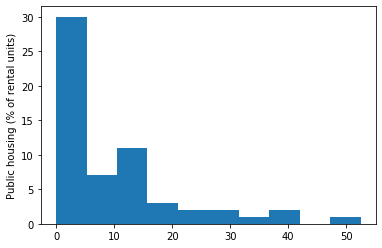

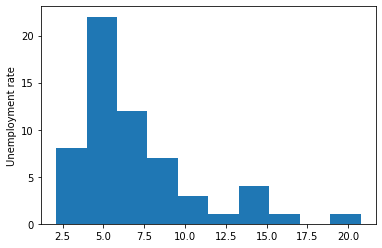

In [44]:
#remove neighbour column

no_neighbour = neighbourhood_census_trimmed.drop(['Neighborhood'], axis=1)

for i in no_neighbour.columns:
    plt.figure()
    plt.hist(no_neighbour[i])
    plt.ylabel(i)


In [47]:
percent_missing = no_neighbour.isnull().sum() * 100 / len(no_neighbour)
missing_value_df = pd.DataFrame({'column_name': no_neighbour.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True,ascending=False)
missing_value_df

,column_name,percent_missing
Car-free commute (% of commuters),Car-free commute (% of commuters),0.0
Disabled population,Disabled population,0.0
Foreign-born population,Foreign-born population,0.0
Median household income (2018$),Median household income (2018$),0.0
"Median rent, all (2018$)","Median rent, all (2018$)",0.0
Moderately rent-burdened households,Moderately rent-burdened households,0.0
Percent Asian,Percent Asian,0.0
Percent Hispanic,Percent Hispanic,0.0
Percent black,Percent black,0.0
Percent white,Percent white,0.0


# Subway Data

In [51]:
subway_raw = pd.read_csv('archive/NYC_subway_traffic_2017-2021.csv')
subway_raw.head()
subway_raw['year'] = pd.DatetimeIndex(subway_raw['Datetime']).year
subway_raw['month'] = pd.DatetimeIndex(subway_raw['Datetime']).month

subway_raw.head()

,Unique ID,Datetime,Stop Name,Remote Unit,Line,Connecting Lines,Daytime Routes,North Direction Label,South Direction Label,Division,Structure,Borough,Neighborhood,Latitude,Longitude,Entries,Exits,year,month
0,1,2017-02-04 04:00:00,103 St,R180,Lexington Av,6,6,Uptown Bronx,Downtown,IRT,Subway,M,East Harlem,40.790600,-73.947478,403.0,222.0,2017,2
1,2,2017-02-04 04:00:00,103 St,R191,Broadway - 7Av,1,1,Uptown Bronx,Downtown,IRT,Subway,M,Upper West Side,40.799446,-73.968379,119.0,145.0,2017,2
2,3,2017-02-04 04:00:00,103 St,R314,8th Av - Fulton St,BC,BC,Uptown Bronx,Downtown Brooklyn,IND,Subway,M,Upper West Side,40.796092,-73.961454,55.0,81.0,2017,2
3,10,2017-02-04 04:00:00,111 St,R355,Liberty Av,A,A,Manhattan,Lefferts Blvd,IND,Elevated,Q,South Ozone Park/Howard Beach,40.684331,-73.832163,156.0,30.0,2017,2
4,11,2017-02-04 04:00:00,116 St,R182,Lexington Av,6,6,Uptown Bronx,Downtown,IRT,Subway,M,East Harlem,40.798629,-73.941617,495.0,303.0,2017,2


## Check for missing value

In [61]:
percent_missing = subway_raw.isnull().sum() * 100 / len(subway_raw)
missing_value_df = pd.DataFrame({'column_name': subway_raw.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True,ascending=False)
missing_value_df

,column_name,percent_missing
North Direction Label,North Direction Label,3.198842
South Direction Label,South Direction Label,2.585992
Unique ID,Unique ID,0.000000
Borough,Borough,0.000000
year,year,0.000000
Exits,Exits,0.000000
Entries,Entries,0.000000
Longitude,Longitude,0.000000
Latitude,Latitude,0.000000
Neighborhood,Neighborhood,0.000000


## Distribution

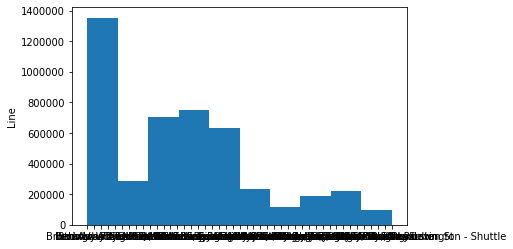

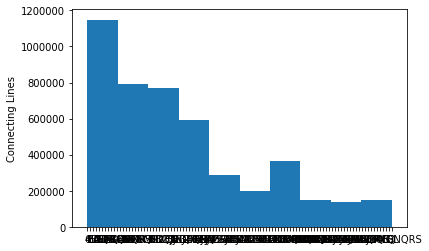

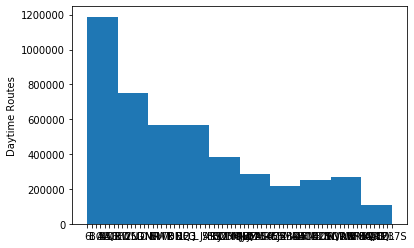

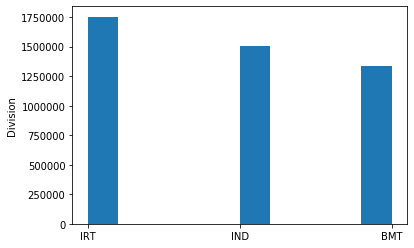

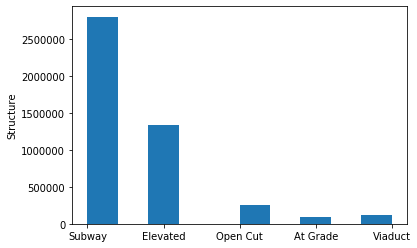

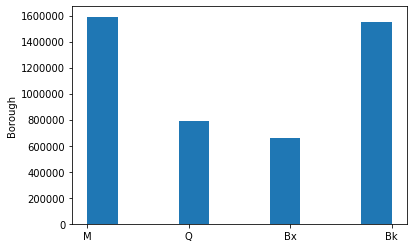

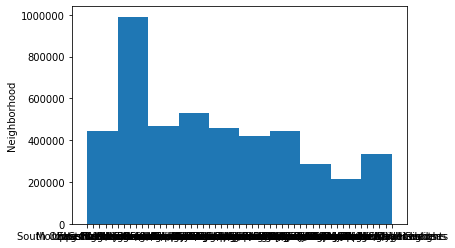

In [63]:
distribution_check = subway_raw[['Line','Connecting Lines','Daytime Routes','Division','Structure','Borough','Neighborhood']]
for i in distribution_check.columns:
    plt.figure()
    plt.hist(distribution_check[i])
    plt.ylabel(i)
    

#no check for north/south direction label

## Selecting Apr, May, June from 2020

In [55]:
subway_filitered = subway_raw.loc[subway_raw['year'] == 2020]
subway_filitered = subway_filitered[subway_filitered['month'].isin([3,4,5])]
subway_filitered.to_csv('subway_filitered.csv')
subway_filitered.head()
subway_filitered.shape

(257942, 19)

## Merging the Subway and neighbourhood data

In [60]:
result = pd.merge(subway_filitered, neighbourhood_census_trimmed, on="Neighborhood")
# result.to_csv('merged.csv')
result.head()

,Unique ID,Datetime,Stop Name,Remote Unit,Line,Connecting Lines,Daytime Routes,North Direction Label,South Direction Label,Division,Structure,Borough,Neighborhood,Latitude,Longitude,Entries,Exits,year,month,Car-free commute (% of commuters),Disabled population,Foreign-born population,Median household income (2018$),"Median rent, all (2018$)",Moderately rent-burdened households,Percent Asian,Percent Hispanic,Percent black,Percent white,Population,Poverty rate,Public housing (% of rental units),Unemployment rate
0,0,2020-03-01 00:00:00,1 Av,R248,Canarsie,L,L,8 Av,Brooklyn,BMT,Subway,M,Lower East Side/Chinatown,40.730953,-73.981628,0.0,0.0,2020,3,89.2,5.9,36.0,40340,1140,28.1,36.1,23.6,6.5,31.0,160490,27.3,24.0,6.28
1,61,2020-03-01 00:00:00,2 Av,R300,6th Av - Culver,F,F,Uptown Queens,Downtown Brooklyn,IND,Subway,M,Lower East Side/Chinatown,40.723402,-73.989938,2682.0,1572.0,2020,3,89.2,5.9,36.0,40340,1140,28.1,36.1,23.6,6.5,31.0,160490,27.3,24.0,6.28
2,85,2020-03-01 00:00:00,3 Av,R330,Canarsie,L,L,8 Av,Brooklyn,BMT,Subway,M,Lower East Side/Chinatown,40.732849,-73.986122,503.0,313.0,2020,3,89.2,5.9,36.0,40340,1140,28.1,36.1,23.6,6.5,31.0,160490,27.3,24.0,6.28
3,219,2020-03-01 00:00:00,Bowery,R311,Jamaica,JZ,JZ,Brooklyn,Broad St,BMT,Subway,M,Lower East Side/Chinatown,40.720280,-73.993915,488.0,263.0,2020,3,89.2,5.9,36.0,40340,1140,28.1,36.1,23.6,6.5,31.0,160490,27.3,24.0,6.28
4,232,2020-03-01 00:00:00,Brooklyn Bridge - City Hall,R044,Lexington Av,456JZ,456,Uptown Bronx,Downtown Brooklyn,IRT,Subway,M,Lower East Side/Chinatown,40.713065,-74.004131,1334.0,493.0,2020,3,89.2,5.9,36.0,40340,1140,28.1,36.1,23.6,6.5,31.0,160490,27.3,24.0,6.28
